In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xlrd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving KPMG_VI_New_raw_data_update_final.xlsx to KPMG_VI_New_raw_data_update_final.xlsx


In [ ]:
dm=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerDemographic',skiprows=1)

In [ ]:
dm.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [ ]:
dm.drop('last_name',inplace=True,axis=1)
dm.drop('default',inplace=True,axis=1)
dm['DOB_Age']=dm['DOB'].dt.year
dm['Age']=2020-dm['DOB_Age']
dm.drop(['DOB','DOB_Age'],inplace=True,axis=1)
dm['Age'].fillna(dm['Age'].mean(),inplace=True)
dm['tenure'].fillna(7.0,inplace=True)
dm.job_industry_category.fillna('Manufacturing',inplace=True)
dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   gender                               4000 non-null   object 
 3   past_3_years_bike_related_purchases  4000 non-null   int64  
 4   job_title                            3494 non-null   object 
 5   job_industry_category                4000 non-null   object 
 6   wealth_segment                       4000 non-null   object 
 7   deceased_indicator                   4000 non-null   object 
 8   owns_car                             4000 non-null   object 
 9   tenure                               4000 non-null   float64
 10  Age                                  4000 non-null   float64
dtypes: float64(2), int64(2), objec

In [ ]:
dm.owns_car.value_counts().values

array([2024, 1976])

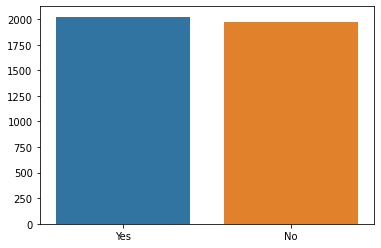

In [ ]:
sns.barplot(dm.owns_car.value_counts().index,dm.owns_car.value_counts().values)

In [ ]:
dm1=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='CustomerAddress',skiprows=1)

In [ ]:
dm1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [ ]:
dm1.drop(['address','country'],inplace=True,axis=1)

In [ ]:
final1=pd.merge(dm,dm1,on='customer_id',how='inner')

In [ ]:
final1.head()

,customer_id,first_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,postcode,state,property_valuation
0,1,Laraine,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,67.0,2016,New South Wales,10
1,2,Eli,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,40.0,2153,New South Wales,10
2,4,Talbot,Male,33,NaN,IT,Mass Customer,N,No,7.0,59.0,4211,QLD,9
3,5,Sheila-kathryn,Female,56,Senior Editor,Manufacturing,Affluent Customer,N,Yes,8.0,43.0,2448,New South Wales,4
4,6,Curr,Male,35,NaN,Retail,High Net Worth,N,Yes,13.0,54.0,3216,VIC,9


In [ ]:
#final1.drop(['default'],inplace=True,axis=1)

In [ ]:
final1.drop(['first_name'],inplace=True,axis=1)

In [ ]:
final1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 0 to 3995
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3996 non-null   int64  
 1   gender                               3996 non-null   object 
 2   past_3_years_bike_related_purchases  3996 non-null   int64  
 3   job_title                            3492 non-null   object 
 4   job_industry_category                3996 non-null   object 
 5   wealth_segment                       3996 non-null   object 
 6   deceased_indicator                   3996 non-null   object 
 7   owns_car                             3996 non-null   object 
 8   tenure                               3996 non-null   float64
 9   Age                                  3996 non-null   float64
 10  postcode                             3996 non-null   int64  
 11  state                         

In [ ]:
final1['state'].replace({'New South Wales':'NSW','Victoria':'VIC'},inplace=True)

In [ ]:
tr=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='Transactions',skiprows=1)

In [ ]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
tr1=tr[['customer_id','list_price']]
sum1=tr1.groupby(['customer_id']).sum()

In [ ]:
sum1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3494 entries, 1 to 5034
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   list_price  3494 non-null   float64
dtypes: float64(1)
memory usage: 54.6 KB


In [ ]:
tr2=tr[['customer_id','product_id']]
sum2=tr2.groupby(['customer_id']).count()

In [ ]:
sum2

,product_id
customer_id,
1,11
2,3
3,8
4,2
5,6
...,...
3497,3
3498,6
3499,7


In [ ]:
sum1.reset_index(inplace=True)
sum2.reset_index(inplace=True)

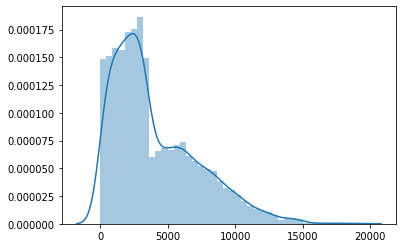

In [ ]:
sns.distplot(sum1)

In [ ]:
import scipy

In [ ]:
sum1

,customer_id,list_price
0,1,9084.45
1,2,4149.07
2,3,9888.23
3,4,1047.72
4,5,5903.20
...,...,...
3489,3497,3744.07
3490,3498,5177.06
3491,3499,7673.48
3492,3500,4922.41


In [ ]:
sum1['list_price_bins']=pd.cut(sum1['list_price'],bins=[0,2500,3500,7500,10000,15000,20000],labels=['less than 2500','2500-3500(very high)','(3500-7500)','(7500-10000)','(10000-15000)','(15000-20000)'])

In [ ]:
sum1['list_price_bins'].value_counts()

(3500-7500)             1784
(7500-10000)             715
(10000-15000)            394
2500-3500(very high)     297
less than 2500           289
(15000-20000)             15
Name: list_price_bins, dtype: int64

In [ ]:
sum1.drop('list_price',inplace=True,axis=1)
#sum1.reset_index(inplace=True)

In [ ]:
finalsum1=pd.merge(final1,sum1,on='customer_id',how='inner')
finalsum1.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,postcode,state,property_valuation,list_price_bins
0,1,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,67.0,2016,NSW,10,(7500-10000)
1,2,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,40.0,2153,NSW,10,(3500-7500)
2,4,Male,33,NaN,IT,Mass Customer,N,No,7.0,59.0,4211,QLD,9,less than 2500
3,5,Female,56,Senior Editor,Manufacturing,Affluent Customer,N,Yes,8.0,43.0,2448,NSW,4,(3500-7500)
4,6,Male,35,NaN,Retail,High Net Worth,N,Yes,13.0,54.0,3216,VIC,9,(3500-7500)


In [ ]:
finalsum1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3489 entries, 0 to 3488
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   customer_id                          3489 non-null   int64   
 1   gender                               3489 non-null   object  
 2   past_3_years_bike_related_purchases  3489 non-null   int64   
 3   job_title                            3068 non-null   object  
 4   job_industry_category                3489 non-null   object  
 5   wealth_segment                       3489 non-null   object  
 6   deceased_indicator                   3489 non-null   object  
 7   owns_car                             3489 non-null   object  
 8   tenure                               3489 non-null   float64 
 9   Age                                  3489 non-null   float64 
 10  postcode                             3489 non-null   int64   
 11  state            

In [ ]:
finalsum1.drop('job_title',inplace=True,axis=1)

In [ ]:
finalsum1['gender'].replace({'F':'Female'},inplace=True)
finalsum1['gender'].replace({'Femal':'Female'},inplace=True)

finalsum1['gender'].replace({'M':'Male'},inplace=True)

In [ ]:
finalsum1.gender.value_counts()

Female    1758
Male      1654
U           77
Name: gender, dtype: int64

In [ ]:
state_dum=pd.get_dummies(finalsum1['state'])
#state_dum
gender_dum=pd.get_dummies(finalsum1['gender'])
job_cat_dum=pd.get_dummies(finalsum1['job_industry_category'])
wealth_cat_dum=pd.get_dummies(finalsum1['wealth_segment'])
owns_car_dum=pd.get_dummies(finalsum1['owns_car'])
dec_indic_dum=pd.get_dummies(finalsum1['deceased_indicator'])

In [ ]:
finalsum1[['Female','Male']]=gender_dum[['Female','Male']]

In [ ]:
job_cat_dum.columns

Index(['Argiculture', 'Entertainment', 'Financial Services', 'Health', 'IT',
       'Manufacturing', 'Property', 'Retail', 'Telecommunications'],
      dtype='object')

In [ ]:
finalsum1[['NSW','QLD','VIC']]=state_dum[['NSW','QLD','VIC']]
finalsum1[job_cat_dum.columns]=job_cat_dum
finalsum1[wealth_cat_dum.columns]=wealth_cat_dum
finalsum1[owns_car_dum.columns]=owns_car_dum
finalsum1[dec_indic_dum.columns]=dec_indic_dum

In [ ]:
finalsum1.columns

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'Age', 'postcode', 'state', 'property_valuation',
       'list_price_bins', 'Female', 'Male', 'NSW', 'QLD', 'VIC', 'Argiculture',
       'Entertainment', 'Financial Services', 'Health', 'IT', 'Manufacturing',
       'Property', 'Retail', 'Telecommunications', 'Affluent Customer',
       'High Net Worth', 'Mass Customer', 'No', 'Yes', 'N', 'Y'],
      dtype='object')

In [ ]:
finalsum1.drop(['gender',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car'],inplace=True,axis=1)

In [ ]:
finalsum1.drop('state',inplace=True,axis=1)

In [ ]:
target1=finalsum1['list_price_bins']

In [ ]:
#finalsum1['list_price_bins']=target1

In [ ]:
#list1=pd.get_dummies(finalsum1['list_price_bins'])
#finalsum1[list1.columns]=list1

In [ ]:
finalsum1.drop('list_price_bins',inplace=True,axis=1)

In [ ]:
#(finalsum1.columns)

In [ ]:
#(test1.columns)

-----------------------------------------------------------

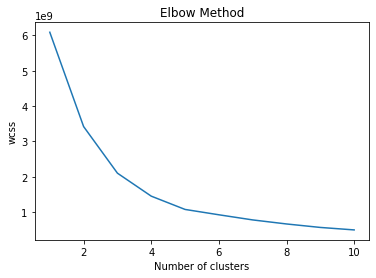

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(finalsum1)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
km=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
t=km.fit_predict(finalsum1)

In [ ]:
set(t)

{0, 1, 2, 3}

In [ ]:
finalsum1['cluster']=t

In [ ]:
finalsum1.groupby(['cluster']).count()

,customer_id,past_3_years_bike_related_purchases,tenure,Age,postcode,property_valuation,Female,Male,NSW,QLD,VIC,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications,Affluent Customer,High Net Worth,Mass Customer,No,Yes,N,Y
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239
1,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268,1268
2,465,465,465,465,465,465,465,465,465,465,465,465,465,465,465,465,465,465,465,465,465,465,465,465,465,465,465
3,517,517,517,517,517,517,517,517,517,517,517,517,517,517,517,517,517,517,517,517,517,517,517,517,517,517,517


In [ ]:
finalsum1[finalsum1['cluster']==0]

,customer_id,past_3_years_bike_related_purchases,tenure,Age,postcode,property_valuation,Female,Male,NSW,QLD,VIC,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications,Affluent Customer,High Net Worth,Mass Customer,No,Yes,N,Y,cluster
1741,1749,66,4.0,40.0,3149,9,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0
1746,1754,24,15.0,55.0,3114,10,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0
1750,1758,16,6.0,49.0,2800,2,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
1752,1760,68,15.0,54.0,3130,8,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0
1753,1761,96,14.0,46.0,2170,9,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3482,3494,72,1.0,22.0,2033,10,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
3483,3495,57,8.0,33.0,2767,9,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0
3484,3496,99,19.0,34.0,2171,9,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0
3486,3498,28,5.0,25.0,3012,4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0


In [ ]:
test=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='NewCustomerList',skiprows=1)

In [ ]:
test.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [ ]:
test1=test[['gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state',
       'property_valuation']]

In [ ]:
test1.head()

,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,property_valuation
0,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,6
1,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,11
2,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,5
3,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,1
4,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,9


In [ ]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   gender                               1000 non-null   object        
 1   past_3_years_bike_related_purchases  1000 non-null   int64         
 2   DOB                                  983 non-null    datetime64[ns]
 3   job_title                            894 non-null    object        
 4   job_industry_category                835 non-null    object        
 5   wealth_segment                       1000 non-null   object        
 6   deceased_indicator                   1000 non-null   object        
 7   owns_car                             1000 non-null   object        
 8   tenure                               1000 non-null   int64         
 9   address                              1000 non-null   object        
 10  postcode     

In [ ]:
test1.drop(['address','job_title'],inplace=True,axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   gender                               1000 non-null   object        
 1   past_3_years_bike_related_purchases  1000 non-null   int64         
 2   DOB                                  983 non-null    datetime64[ns]
 3   job_industry_category                835 non-null    object        
 4   wealth_segment                       1000 non-null   object        
 5   deceased_indicator                   1000 non-null   object        
 6   owns_car                             1000 non-null   object        
 7   tenure                               1000 non-null   int64         
 8   postcode                             1000 non-null   int64         
 9   state                                1000 non-null   object        
 10  property_valu

In [ ]:
test1['DOB_Age']=test1['DOB'].dt.year
test1['Age']=2020-test1['DOB_Age']
test1.drop(['DOB_Age','DOB'],inplace=True,axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [ ]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               1000 non-null   object 
 1   past_3_years_bike_related_purchases  1000 non-null   int64  
 2   job_industry_category                835 non-null    object 
 3   wealth_segment                       1000 non-null   object 
 4   deceased_indicator                   1000 non-null   object 
 5   owns_car                             1000 non-null   object 
 6   tenure                               1000 non-null   int64  
 7   postcode                             1000 non-null   int64  
 8   state                                1000 non-null   object 
 9   property_valuation                   1000 non-null   int64  
 10  Age                                  983 non-null    float64
dtypes: float64(1), int64(4), object

In [ ]:
state_dum1=pd.get_dummies(test1['state'])
#state_dum
gender_dum1=pd.get_dummies(test1['gender'])
job_cat_dum1=pd.get_dummies(test1['job_industry_category'])
wealth_cat_dum1=pd.get_dummies(test1['wealth_segment'])
owns_car_dum1=pd.get_dummies(test1['owns_car'])
dec_indic_dum1=pd.get_dummies(test1['deceased_indicator'])

test1[state_dum1.columns]=state_dum1
test1[gender_dum1.columns]=gender_dum1
test1[job_cat_dum1.columns]=job_cat_dum1
test1[wealth_cat_dum1.columns]=wealth_cat_dum1
test1[owns_car_dum1.columns]=owns_car_dum1
test1[dec_indic_dum1.columns]=dec_indic_dum1

test1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               1000 non-null   object 
 1   past_3_years_bike_related_purchases  1000 non-null   int64  
 2   job_industry_category                835 non-null    object 
 3   wealth_segment                       1000 non-null   object 
 4   deceased_indicator                   1000 non-null   object 
 5   owns_car                             1000 non-null   object 
 6   tenure                               1000 non-null   int64  
 7   postcode                             1000 non-null   int64  
 8   state                                1000 non-null   object 
 9   property_valuation                   1000 non-null   int64  
 10  Age                                  983 non-null    float64
 11  NSW                            

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
finalsum1.columns

Index(['customer_id', 'past_3_years_bike_related_purchases', 'tenure', 'Age',
       'postcode', 'property_valuation', 'Female', 'Male', 'NSW', 'QLD', 'VIC',
       'Argiculture', 'Entertainment', 'Financial Services', 'Health', 'IT',
       'Manufacturing', 'Property', 'Retail', 'Telecommunications',
       'Affluent Customer', 'High Net Worth', 'Mass Customer', 'No', 'Yes',
       'N', 'Y', 'cluster'],
      dtype='object')

In [ ]:
test1.columns

Index(['gender', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'postcode', 'state', 'property_valuation', 'Age',
       'NSW', 'QLD', 'VIC', 'Female', 'Male', 'U', 'Argiculture',
       'Entertainment', 'Financial Services', 'Health', 'IT', 'Manufacturing',
       'Property', 'Retail', 'Telecommunications', 'Affluent Customer',
       'High Net Worth', 'Mass Customer', 'No', 'Yes', 'N'],
      dtype='object')

In [ ]:
test1.drop(['job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car','state'],inplace=True,axis=1)

In [ ]:
finalsum1.columns

Index(['customer_id', 'past_3_years_bike_related_purchases', 'tenure', 'Age',
       'postcode', 'property_valuation', 'Female', 'Male', 'NSW', 'QLD', 'VIC',
       'Argiculture', 'Entertainment', 'Financial Services', 'Health', 'IT',
       'Manufacturing', 'Property', 'Retail', 'Telecommunications',
       'Affluent Customer', 'High Net Worth', 'Mass Customer', 'No', 'Yes',
       'N', 'Y', 'cluster'],
      dtype='object')

In [ ]:
test1.columns

Index(['gender', 'past_3_years_bike_related_purchases', 'tenure', 'postcode',
       'property_valuation', 'Age', 'NSW', 'QLD', 'VIC', 'Female', 'Male', 'U',
       'Argiculture', 'Entertainment', 'Financial Services', 'Health', 'IT',
       'Manufacturing', 'Property', 'Retail', 'Telecommunications',
       'Affluent Customer', 'High Net Worth', 'Mass Customer', 'No', 'Yes',
       'N'],
      dtype='object')

In [ ]:
test1.drop(['gender','U','N'],axis=1,inplace=True)

In [ ]:
finalsum1.drop(['N'],inplace=True,axis=1)

In [ ]:
print(len(finalsum1.columns))
print(len(test1.columns))

27
24


In [ ]:
finalsum1.drop('Y',inplace=True,axis=1)

In [ ]:
finalsum1.drop('cluster',inplace=True,axis=1)#columns#==test1.columns

In [ ]:
len(finalsum1.columns)

25

In [ ]:
finalsum1.columns#==test1.columns

Index(['customer_id', 'past_3_years_bike_related_purchases', 'tenure', 'Age',
       'postcode', 'property_valuation', 'Female', 'Male', 'NSW', 'QLD', 'VIC',
       'Argiculture', 'Entertainment', 'Financial Services', 'Health', 'IT',
       'Manufacturing', 'Property', 'Retail', 'Telecommunications',
       'Affluent Customer', 'High Net Worth', 'Mass Customer', 'No', 'Yes'],
      dtype='object')

In [ ]:
test11=test1[['past_3_years_bike_related_purchases', 'tenure', 'Age', 'postcode',
       'property_valuation', 'Female', 'Male', 'NSW', 'QLD', 'Argiculture',
       'Entertainment', 'Financial Services', 'Health', 'IT', 'Manufacturing',
       'Property', 'Retail', 'Telecommunications', 'Affluent Customer',
       'High Net Worth', 'Mass Customer', 'No', 'Yes']]

In [ ]:
finalsum1.drop(['customer_id','VIC'],inplace=True,axis=1)

In [ ]:
finalsum1.columns==test11.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

ValueError: ignored

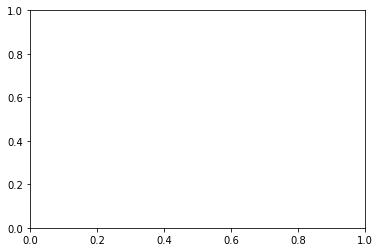

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    #km=DBSCAN()
    km.fit(finalsum1)
    #wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
km1=KMeans(n_clusters=3,init='k-means++', max_iter=300, n_init=10, random_state=0)
#km1=DBSCAN(eps=0.01)
cluster=km1.fit_predict(finalsum1)
    

In [ ]:
test1['Age'].fillna(test1['Age'].mean(),inplace=True)

In [ ]:
cluster2=km1.fit_predict(test1)

In [ ]:
finalsum1['cluster']=cluster

In [ ]:
finalsum1.groupby(['cluster']).sum()

,past_3_years_bike_related_purchases,tenure,Age,postcode,property_valuation,Female,Male,NSW,QLD,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications,Affluent Customer,High Net Worth,Mass Customer,No,Yes
cluster,,,,,,,,,,,,,,,,,,,,,,,
0,49076,11003.0,44516.355993,3144967,7479,526.0,484.0,308.0,0.0,19.0,39.0,194.0,165.0,58.0,387.0,66.0,84.0,19.0,250.0,273.0,508.0,525.0,506.0
1,43920,9554.0,38029.355993,3826362,5072,449.0,429.0,0.0,743.0,32.0,36.0,186.0,114.0,48.0,326.0,55.0,87.0,16.0,224.0,228.0,448.0,446.0,454.0
2,77253,16430.0,67014.957322,3458468,13672,783.0,741.0,1558.0,0.0,49.0,48.0,306.0,253.0,82.0,550.0,109.0,133.0,28.0,377.0,393.0,788.0,751.0,807.0


In [ ]:
finalsum1.groupby(['cluster']).mean()

,past_3_years_bike_related_purchases,tenure,Age,postcode,property_valuation,Female,Male,NSW,QLD,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications,Affluent Customer,High Net Worth,Mass Customer,No,Yes
cluster,,,,,,,,,,,,,,,,,,,,,,,
0,47.600388,10.672163,43.177843,3050.404462,7.254122,0.510184,0.469447,0.298739,0.000000,0.018429,0.037827,0.188167,0.160039,0.056256,0.375364,0.064016,0.081474,0.018429,0.242483,0.264791,0.492726,0.509214,0.490786
1,48.800000,10.615556,42.254840,4251.513333,5.635556,0.498889,0.476667,0.000000,0.825556,0.035556,0.040000,0.206667,0.126667,0.053333,0.362222,0.061111,0.096667,0.017778,0.248889,0.253333,0.497778,0.495556,0.504444
2,49.584724,10.545571,43.013451,2219.812580,8.775353,0.502567,0.475610,1.000000,0.000000,0.031451,0.030809,0.196406,0.162388,0.052632,0.353017,0.069961,0.085366,0.017972,0.241977,0.252246,0.505777,0.482028,0.517972


In [ ]:
tr.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
tr1=tr[['customer_id','list_price']]

In [ ]:
tr.shape

(20000, 13)

In [ ]:
list_price1=tr1.groupby(['customer_id']).sum()

In [ ]:
list_price1['bins']=pd.cut(list_price1['list_price'],bins=[0,5000,10000,15000,20000],labels=['one','two','three','four'])

In [ ]:
list_price1

,list_price,bins
customer_id,,
1,9084.45,two
2,4149.07,one
3,9888.23,two
4,1047.72,one
5,5903.20,two
...,...,...
3497,3744.07,one
3498,5177.06,two
3499,7673.48,two


In [ ]:
final1

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,postcode,state,property_valuation
0,1,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,67.000000,2016,NSW,10
1,2,Male,81,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,40.000000,2153,NSW,10
2,4,Male,33,NaN,IT,Mass Customer,N,No,7.0,59.000000,4211,QLD,9
3,5,Female,56,Senior Editor,Manufacturing,Affluent Customer,N,Yes,8.0,43.000000,2448,NSW,4
4,6,Male,35,NaN,Retail,High Net Worth,N,Yes,13.0,54.000000,3216,VIC,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,3996,Female,8,VP Product Management,Health,Mass Customer,N,No,19.0,45.000000,3977,VIC,6
3992,3997,Female,87,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,19.000000,2350,NSW,2
3993,3998,U,60,Assistant Manager,IT,High Net Worth,N,No,7.0,42.969333,2540,NSW,6
3994,3999,Male,11,NaN,Manufacturing,Affluent Customer,N,Yes,10.0,47.000000,3064,VIC,3


In [ ]:
finalsum1

,past_3_years_bike_related_purchases,tenure,Age,postcode,property_valuation,Female,Male,NSW,QLD,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications,Affluent Customer,High Net Worth,Mass Customer,No,Yes,cluster
0,93,11.0,67.0,2016,10,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,2
1,81,16.0,40.0,2153,10,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,2
2,33,7.0,59.0,4211,9,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
3,56,8.0,43.0,2448,4,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,2
4,35,13.0,54.0,3216,9,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,99,19.0,34.0,2171,9,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,2
3485,73,18.0,34.0,3976,5,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1
3486,28,5.0,25.0,3012,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3487,29,7.0,41.0,4073,9,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1


In [ ]:
list_price1.reset_index(inplace=True)
list_price1.drop('list_price',inplace=True,axis=1)

KeyError: ignored

In [ ]:
finalsum1

,past_3_years_bike_related_purchases,tenure,Age,postcode,property_valuation,Female,Male,NSW,QLD,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications,Affluent Customer,High Net Worth,Mass Customer,No,Yes,cluster
0,93,11.0,67.0,2016,10,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,2
1,81,16.0,40.0,2153,10,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,2
2,33,7.0,59.0,4211,9,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
3,56,8.0,43.0,2448,4,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,2
4,35,13.0,54.0,3216,9,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,99,19.0,34.0,2171,9,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,2
3485,73,18.0,34.0,3976,5,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1
3486,28,5.0,25.0,3012,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3487,29,7.0,41.0,4073,9,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1


In [ ]:
finalsum1

,past_3_years_bike_related_purchases,tenure,Age,postcode,property_valuation,Female,Male,NSW,QLD,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications,Affluent Customer,High Net Worth,Mass Customer,No,Yes,cluster
0,93,11.0,67.0,2016,10,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,2
1,81,16.0,40.0,2153,10,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,2
2,33,7.0,59.0,4211,9,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1
3,56,8.0,43.0,2448,4,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,2
4,35,13.0,54.0,3216,9,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,99,19.0,34.0,2171,9,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,2
3485,73,18.0,34.0,3976,5,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1
3486,28,5.0,25.0,3012,4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3487,29,7.0,41.0,4073,9,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1


In [ ]:
final2_class=pd.merge(finalsum1,list_price1,on='customer_id')
final2_class.head()

KeyError: ignored

In [ ]:
final2_class_label=pd.DataFrame()
final2_class_label['bins']=final2_class['bins']
final2_class.drop('bins',inplace=True,axis=1)

NameError: ignored

In [ ]:
final2_class.drop('customer_id',inplace=True,axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression().fit(final2_class,final2_class_label)

y_pred=model.predict(test1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ValueError: ignored

In [ ]:
(final2_class.drop(['list_price','N','Y'],inplace=True,axis=1))

In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression().fit(final2_class,final2_class_label)

y_pred=model.predict(test1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
test1

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Age,NSW,QLD,VIC,Female,Male,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications,Affluent Customer,High Net Worth,Mass Customer,No,Yes
0,86,14,4500,6,63.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,16,2113,11,50.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0
2,10,10,3505,5,46.0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,64,5,4814,1,41.0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
4,34,19,2093,9,55.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,60,9,2200,7,61.0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0
996,22,6,2196,10,19.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0
997,17,15,4702,2,66.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
998,30,19,4215,2,68.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
test1['cluster2']=cluster2
test1[test1['cluster2']==2]

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Age,NSW,QLD,VIC,Female,Male,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications,Affluent Customer,High Net Worth,Mass Customer,No,Yes,cluster2
0,86,14,4500,6,63.0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,2
3,64,5,4814,1,41.0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,2
5,39,22,4075,7,69.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,2
7,74,10,4814,5,48.0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,2
9,72,17,4151,5,35.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,83,22,4720,1,69.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,2
990,60,9,4209,6,66.0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,2
992,32,8,4118,3,47.0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,2
997,17,15,4702,2,66.0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,2


In [ ]:
test1.groupby(['cluster2']).mean()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Age,NSW,QLD,VIC,Female,Male,Argiculture,Entertainment,Financial Services,Health,IT,Manufacturing,Property,Retail,Telecommunications,Affluent Customer,High Net Worth,Mass Customer,No,Yes
cluster2,,,,,,,,,,,,,,,,,,,,,,,,
0,47.830827,11.439850,3063.624060,7.270677,47.934660,0.233083,0.000000,0.766917,0.511278,0.477444,0.018797,0.041353,0.244361,0.165414,0.045113,0.191729,0.052632,0.075188,0.018797,0.240602,0.255639,0.503759,0.500000,0.500000
1,49.876126,11.211712,2228.988739,8.592342,49.690193,1.000000,0.000000,0.000000,0.502252,0.481982,0.029279,0.036036,0.173423,0.168919,0.045045,0.200450,0.078829,0.069820,0.031532,0.227477,0.263514,0.509009,0.538288,0.461712
2,51.613793,11.610345,4188.386207,5.682759,49.632571,0.000000,0.786207,0.213793,0.531034,0.444828,0.027586,0.034483,0.210345,0.113793,0.065517,0.203448,0.051724,0.093103,0.020690,0.262069,0.227586,0.510345,0.465517,0.534483


In [ ]:
test12=pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name='NewCustomerList',skiprows=1)
test_custid=test12[['first_name','last_name']]

In [ ]:
test1[['first_name','last_name']]=test_custid

In [ ]:
test1['cluster2']=cluster2

In [ ]:
use=test1[test1['cluster2']==2]

In [ ]:
use[['first_name','last_name']]

,first_name,last_name
0,Chickie,Brister
3,Lucine,Stutt
5,Druci,Brandli
7,Nancie,Vian
9,Barthel,Docket
...,...,...
981,Leona,Shorrock
990,Jermaine,Bagshawe
992,Renie,Laundon
997,Melloney,Temby


The Above 290 people can be a cluster and as a strategy can be concentrated 